In [106]:
import sklearn.datasets as datasets
import pandas as pd
import os
import sklearn.model_selection as train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,classification_report
import numpy as np
import matplotlib.pyplot as plt

### Load the Data

In [107]:
path = "D:\Code for tutorials\Machine Learning\datasets\supervised Learnings\classification\KNN\IRIS.csv"
df = pd.read_csv(os.path.join(path))
print(df.head())
x=df.drop('species',axis=1) #features
y=df['species'] #labels
print(f"y without Encoding : {y}")
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print(f"y after Encoding : {y}")

# Data = datasets.load_iris()
# print(Data)
# x = Data.data #features
# y = Data.target #labels
# print(type(Data))


# print(f"The X is {x} and the y is {y}")

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
y without Encoding : 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object
y after Encoding : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\DHUSNIC INFANT DM\AppData\Local\Temp\ipykernel_19204\4077492388.py:1: SyntaxWarning: invalid escape sequence '\C'
  path = "D:\Code for tutorials\Machine Learning\datasets\supervised Learnings\classification\KNN\IRIS.csv"


### 3. Split into training and testing data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split.train_test_split(x,y,test_size=0.2,random_state=42)


print(f"x_train : {x_train}")
print(f"x_test : {x_test}")
print(f"y_train : {y_train}")
print(f"y_test : {y_test}")


x_train :      sepal_length  sepal_width  petal_length  petal_width
22            4.6          3.6           1.0          0.2
15            5.7          4.4           1.5          0.4
65            6.7          3.1           4.4          1.4
11            4.8          3.4           1.6          0.2
42            4.4          3.2           1.3          0.2
..            ...          ...           ...          ...
71            6.1          2.8           4.0          1.3
106           4.9          2.5           4.5          1.7
14            5.8          4.0           1.2          0.2
92            5.8          2.6           4.0          1.2
102           7.1          3.0           5.9          2.1

[120 rows x 4 columns]
x_test :      sepal_length  sepal_width  petal_length  petal_width
73            6.1          2.8           4.7          1.2
18            5.7          3.8           1.7          0.3
118           7.7          2.6           6.9          2.3
78            6.0          2.

### scale the features

(30,)
(30,)


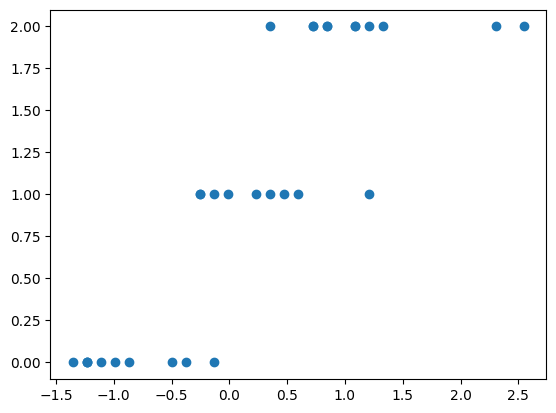

In [125]:
print(x_test[:,0].shape)
print(y_test.shape)
plt.scatter(x_test[:,0],y_test)
plt.show()

In [ ]:
scaler = StandardScaler()
print(f"before scaling x_train : {x_train[:5]}")
x_train = scaler.fit_transform(x_train)
print(f"after scaling x_train : {x_train[:5]}")
print(f"before scaling x_test : {x_test[:5]}")
x_test = scaler.transform(x_test)
print(f"after scaling x_test : {x_test[:5]}")

before scaling x_train :     sepal_length  sepal_width  petal_length  petal_width
22           4.6          3.6           1.0          0.2
15           5.7          4.4           1.5          0.4
65           6.7          3.1           4.4          1.4
11           4.8          3.4           1.6          0.2
42           4.4          3.2           1.3          0.2
after scaling x_train : [[-1.47393679  1.22037928 -1.5639872  -1.30948358]
 [-0.13307079  3.02001693 -1.27728011 -1.04292204]
 [ 1.08589829  0.09560575  0.38562104  0.28988568]
 [-1.23014297  0.77046987 -1.21993869 -1.30948358]
 [-1.7177306   0.32056046 -1.39196294 -1.30948358]]
before scaling x_test :      sepal_length  sepal_width  petal_length  petal_width
73            6.1          2.8           4.7          1.2
18            5.7          3.8           1.7          0.3
118           7.7          2.6           6.9          2.3
78            6.0          2.9           4.5          1.5
76            6.8          2.8         

### Choose and train a model

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

### Predict on test data

In [ ]:
y_pred = model.predict(x_test)

### Evaluate the Model

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
sepal_length = float(input("Enter sepal length: "))
sepal_width = float(input("Enter sepal width: "))
petal_length = float(input("Enter petal length: "))
petal_width = float(input("Enter petal width: "))

array = [sepal_length, sepal_width, petal_length, petal_width]
print(f"array {array}")
# convert array to numpy array
input_array = np.array(array).reshape(1, -1)
print(f"reshaped array {input_array}")
#scale the input array 
input_array = scaler.transform(input_array)
print(f"scaled array {input_array}")

#predict the output
output = model.predict(input_array)
flower_name = label_encoder.inverse_transform(output)
print(f"output {output}")
print(f"flower_name {flower_name}")





array [5.1, 3.5, 1.4, 0.2]
reshaped array [[5.1 3.5 1.4 0.2]]
scaled array [[-0.86445224  0.99542457 -1.33462153 -1.30948358]]
output [0]
flower_name ['Iris-setosa']


d:\Code for tutorials\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
